# **Project 01: Titanic Dataset**



# Importing Libraries

In [73]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [72]:
df = pd.read_csv("/content/Titanic Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
df.shape

(418, 12)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [73]:
gender_mapping = {"male": 0, "female": 1}
df["Sex"] = df["Sex"].map(gender_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
df["Age"].isnull().sum()

86

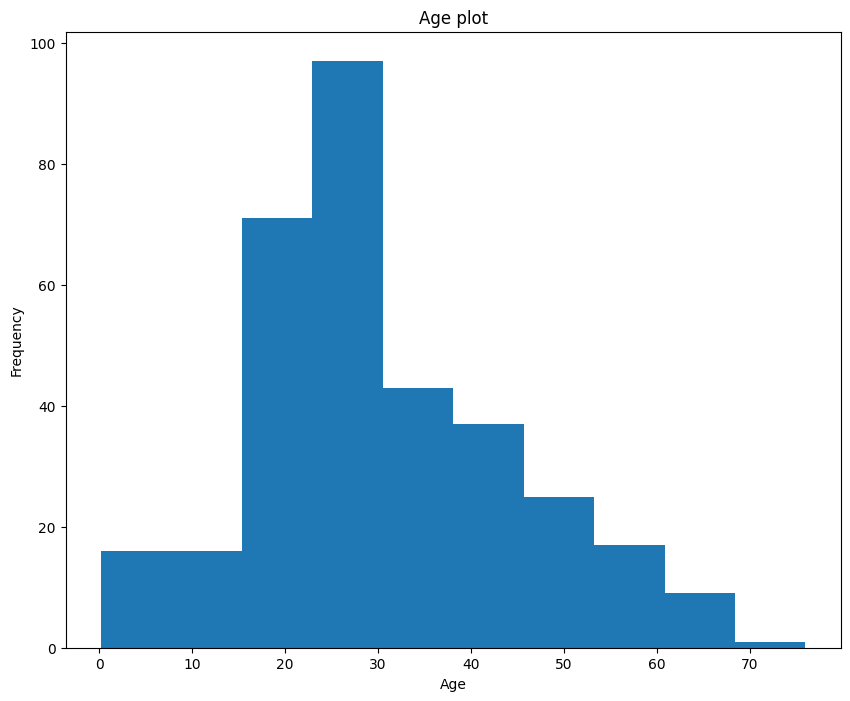

In [74]:
plt.figure(figsize=(10, 8))
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age plot');

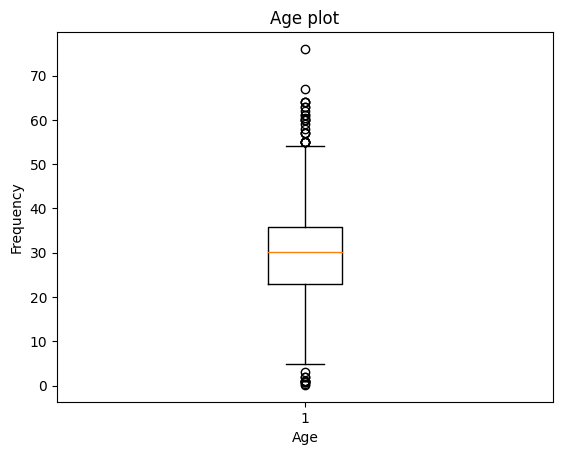

In [77]:

plt.boxplot(df["Age"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age plot');

In [76]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [78]:
df["Cabin"].isnull().sum()

327

In [79]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [80]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [81]:
embarked_mapping = {"Q": 0, "S": 1, "C": 2}
df["Embarked"] = df["Embarked"].map(embarked_mapping)

In [82]:
df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"], inplace = True)

In [84]:
df.shape

(418, 8)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


Function for Exploring and Cleaning the dataset with same columns or nature

In [45]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  #Mapping the `Sex` and `Embarked` fields
  gender_mapping = {"male": 0, "female": 1}
  df["Sex"] = df["Sex"].map(gender_mapping)

  embarked_mapping = {"Q": 0, "S": 1, "C": 2}
  df["Embarked"] = df["Embarked"].map(embarked_mapping)

  #Filling the columns that have null values with their mean as data is continuous
  df["Age"] = df["Age"].fillna(df["Age"].mean())
  df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

  #Dropping unnecessary columns
  df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"], inplace = True)

  return df




In [47]:
df = wrangle("/content/Titanic Dataset.csv")
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1
5,0,3,0,14.0,0,0,9.2250,1
6,1,3,1,30.0,0,0,7.6292,0
7,0,2,0,26.0,1,1,29.0000,1
8,1,3,1,18.0,0,0,7.2292,2
9,0,3,0,21.0,2,0,24.1500,1


Visulising the Dataset according to the survived column

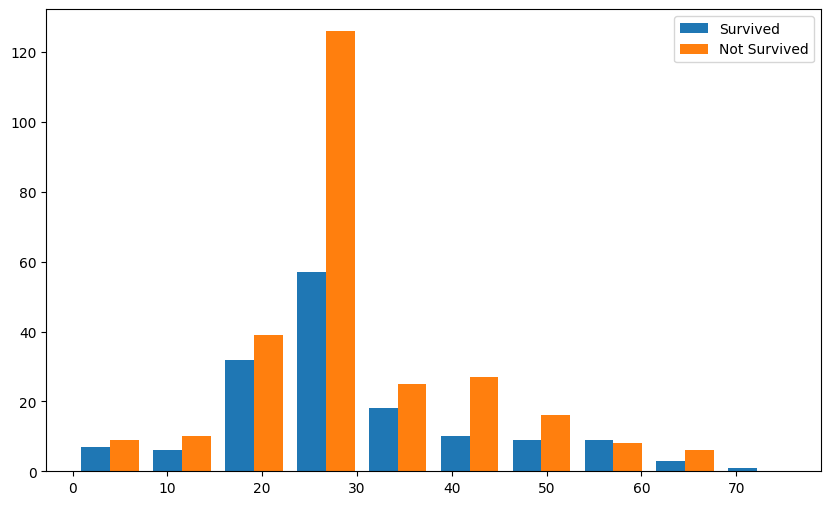

In [8]:
plt.figure(figsize = (10,6))


bins = np.linspace(0, 10, 100)
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],bins = 10, label=['Survived', 'Not Survived'])
plt.legend(loc='upper right')
plt.show()

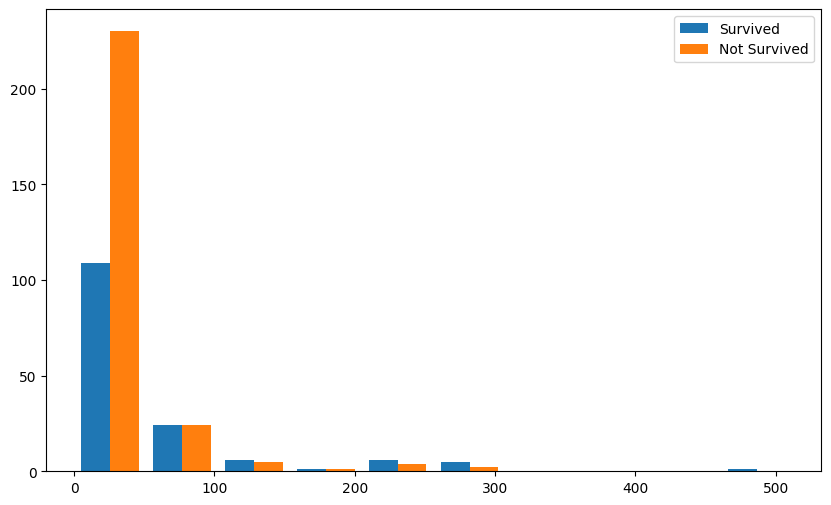

In [9]:
plt.figure(figsize = (10,6))


bins = np.linspace(0, 10, 100)
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],bins = 10, label=['Survived', 'Not Survived'])
plt.legend(loc='upper right')
plt.show()

Checking For Class Imbalance in target

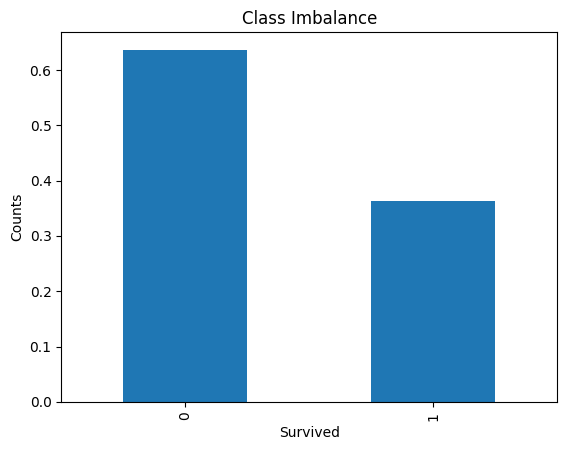

In [14]:
survival = df["Survived"].value_counts(normalize = True)
survival.plot(kind = "bar", title = "Class Imbalance")

plt.xlabel("Survived")
plt.ylabel("Counts");

There exists a class imbalance but it is not extremely skewed so no need of resampling.

Preparing test and train dataset

In [83]:
target = "Survived"
X = df.drop(columns = target)
y = df[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = LogisticRegression(solver='liblinear', max_iter=100)
model.fit(X_train, y_train )

LogisticRegression(solver='liblinear')

In [86]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [87]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

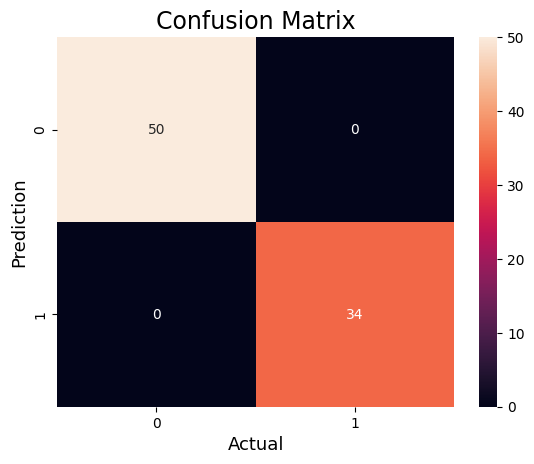

In [89]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

